In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../Course Materials/Data/madrid_weather.csv')

In [4]:
df.head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,1/1/19 0:59,3.1,0.65,64,50,949,0,0.0
1,1/1/19 1:59,2.9,0.95,32,49,949,0,0.0
2,1/1/19 2:59,3.1,0.87,62,46,949,0,0.0
3,1/1/19 3:59,1.9,0.73,75,51,949,0,0.0
4,1/1/19 4:59,0.7,0.57,53,56,949,0,0.0


In [5]:
df['time'] = pd.to_datetime(df['time'])

C:\Users\ghummatova\AppData\Local\Temp\ipykernel_15500\4237337754.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


In [6]:
df.head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0


<Axes: xlabel='time'>

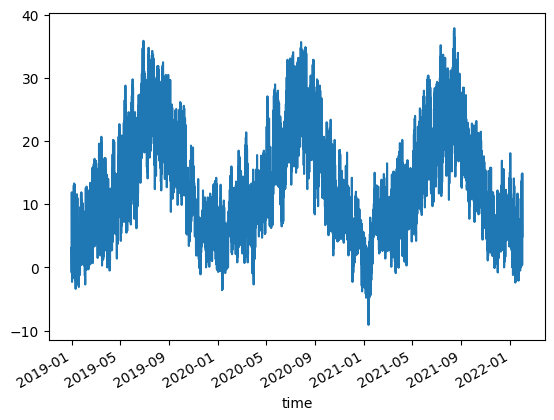

In [7]:
df.set_index('time').loc[:, 'temperature'].plot()

<Axes: xlabel='time'>

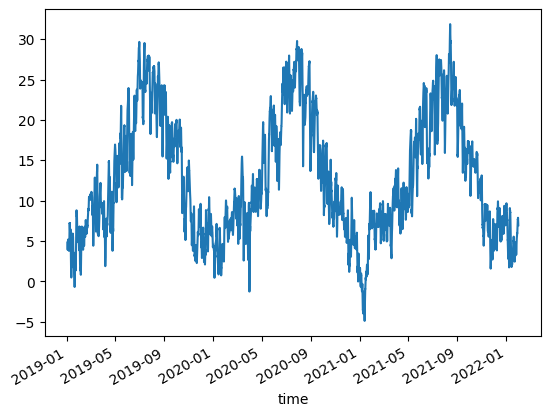

In [8]:
# get daily moving average by setting window to 24 hours
df.set_index('time').loc[:, "temperature"].rolling(24).mean().plot()

<Axes: xlabel='time'>

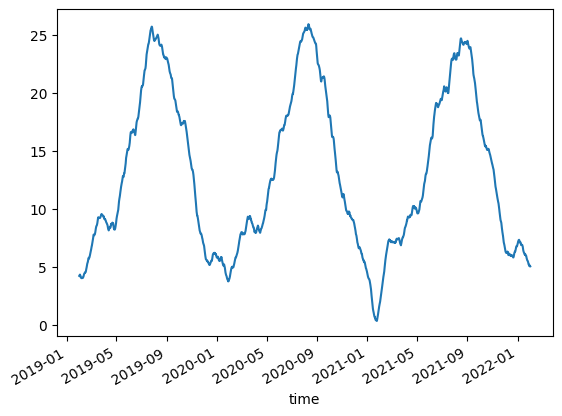

In [9]:
# get monthly moving average by setting window to 24 hours
df.set_index('time').loc[:, "temperature"].rolling(24*30).mean().plot()

# Exponential Smoothing 
Similar to moving average but it gives more weights to recent data points within a window. The weight is controlled by $\alpha$ which is between 1 and 0. Higher $\alpha$, more weight to the recent data

In [12]:
df.assign(
    EWM_1 = df['temperature'].ewm(alpha=.1).mean(),
    EWM_4 = df['temperature'].ewm(alpha = .4).mean()
).head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation,EWM_1,EWM_4
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0,3.100000,3.100000
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0,2.994737,2.975000
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0,3.033579,3.038776
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0,2.703955,2.515441
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0,2.214600,1.728036


In [13]:
import matplotlib.pyplot as plt

In [14]:
df_plot = df.assign(
    EWM_1 = df['temperature'].ewm(alpha=.1).mean(),
    EWM_4 = df['temperature'].ewm(alpha = .4).mean()
).head()

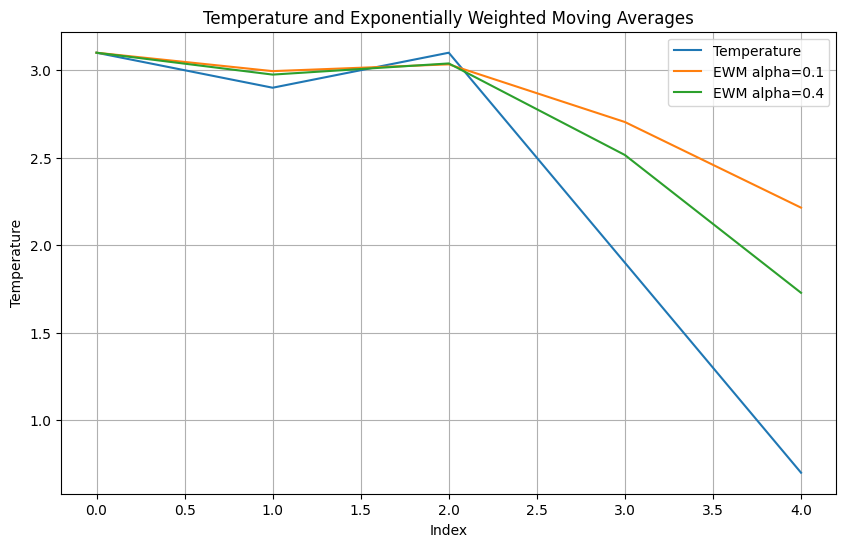

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_plot.index, df_plot['temperature'], label='Temperature')
plt.plot(df_plot.index, df_plot['EWM_1'], label='EWM alpha=0.1')
plt.plot(df_plot.index, df_plot['EWM_4'], label='EWM alpha=0.4')

plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature and Exponentially Weighted Moving Averages')
plt.legend()
plt.grid(True)
plt.show()